# Iris dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [2]:
iris = pd.read_csv('iris_dataset.csv')

iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
iris.groupby(['species']).count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


In [7]:
iris.groupby('species').agg(['mean', 'median'])

iris.groupby('species').agg([np.mean, np.median])

#iris.groupby('species')[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].agg('median')

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

<Axes: xlabel='species', ylabel='sepal_width'>

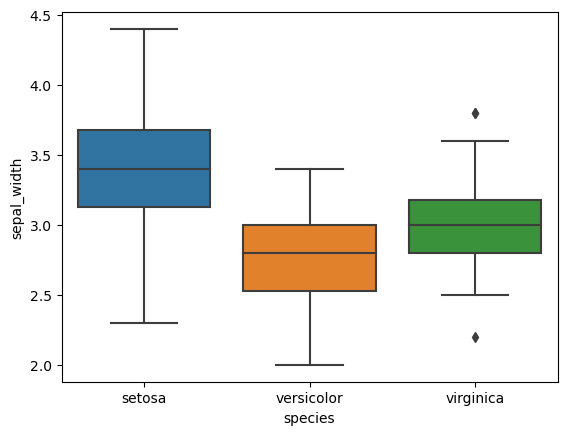

In [8]:
sns.boxplot(x='species', y='sepal_width', data=iris)

<Axes: xlabel='species', ylabel='sepal_length'>

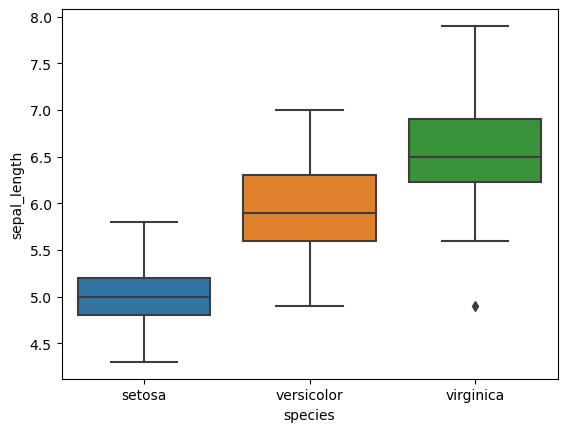

In [9]:
sns.boxplot(x='species', y='sepal_length', data=iris)

<Axes: xlabel='species', ylabel='petal_width'>

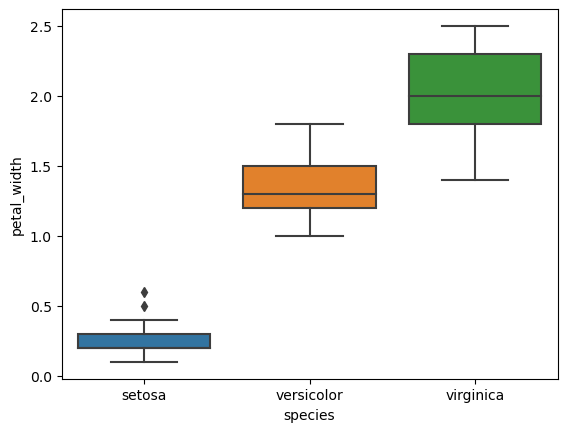

In [10]:
sns.boxplot(x='species', y='petal_width', data=iris)

<Axes: xlabel='species', ylabel='petal_length'>

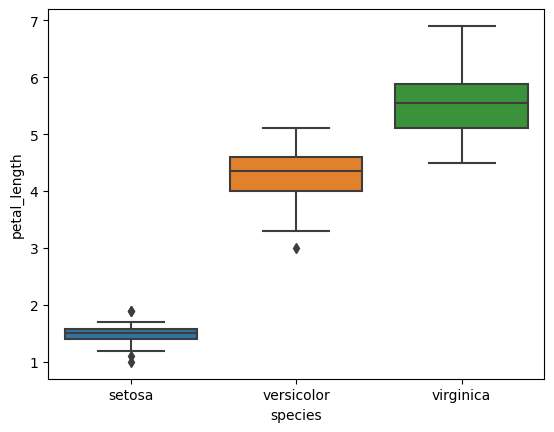

In [11]:
sns.boxplot(x='species', y='petal_length', data=iris)

<Axes: xlabel='species', ylabel='count'>

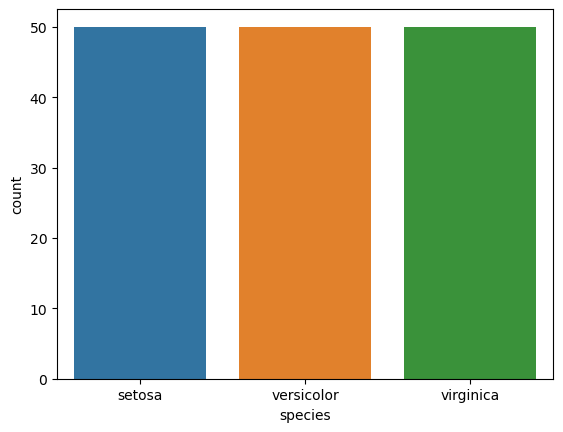

In [12]:
sns.countplot(x='species', data=iris)

C:\Users\Hp\AppData\Local\Temp\ipykernel_8520\668852778.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr(),annot=True)


<Axes: >

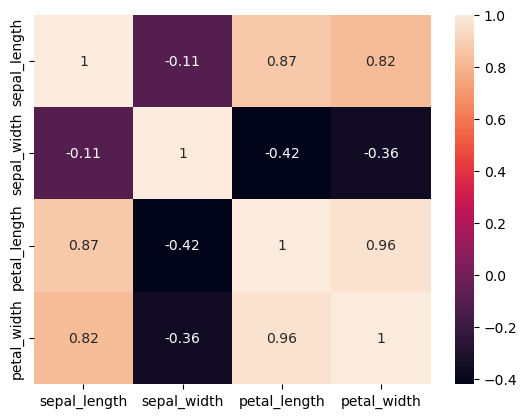

In [22]:
sns.heatmap(iris.corr(),annot=True)

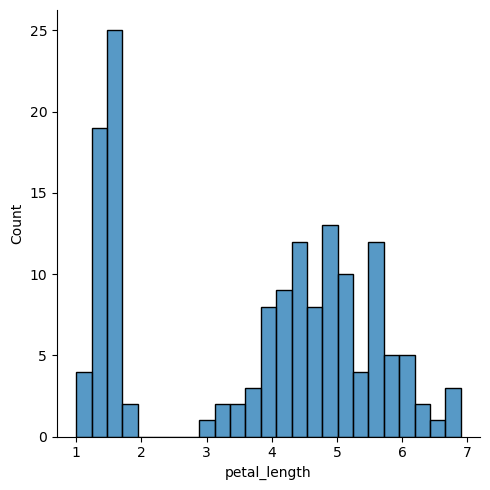

In [14]:
sns.displot(iris['petal_length'], bins=25)

<Axes: xlabel='sepal_width', ylabel='Count'>

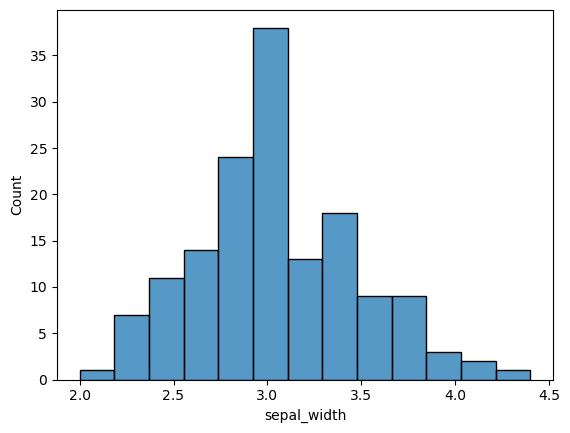

In [15]:
sns.histplot(iris['sepal_width'])

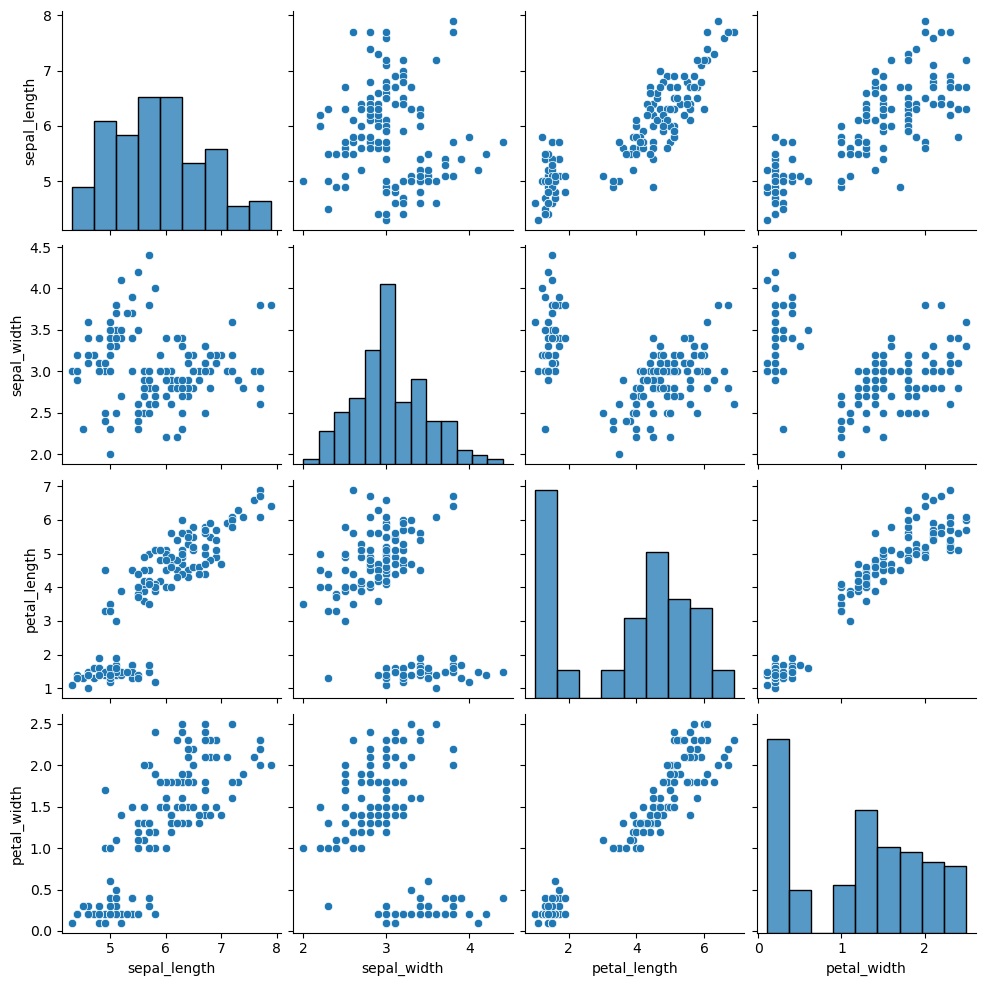

In [16]:
sns.pairplot(iris)

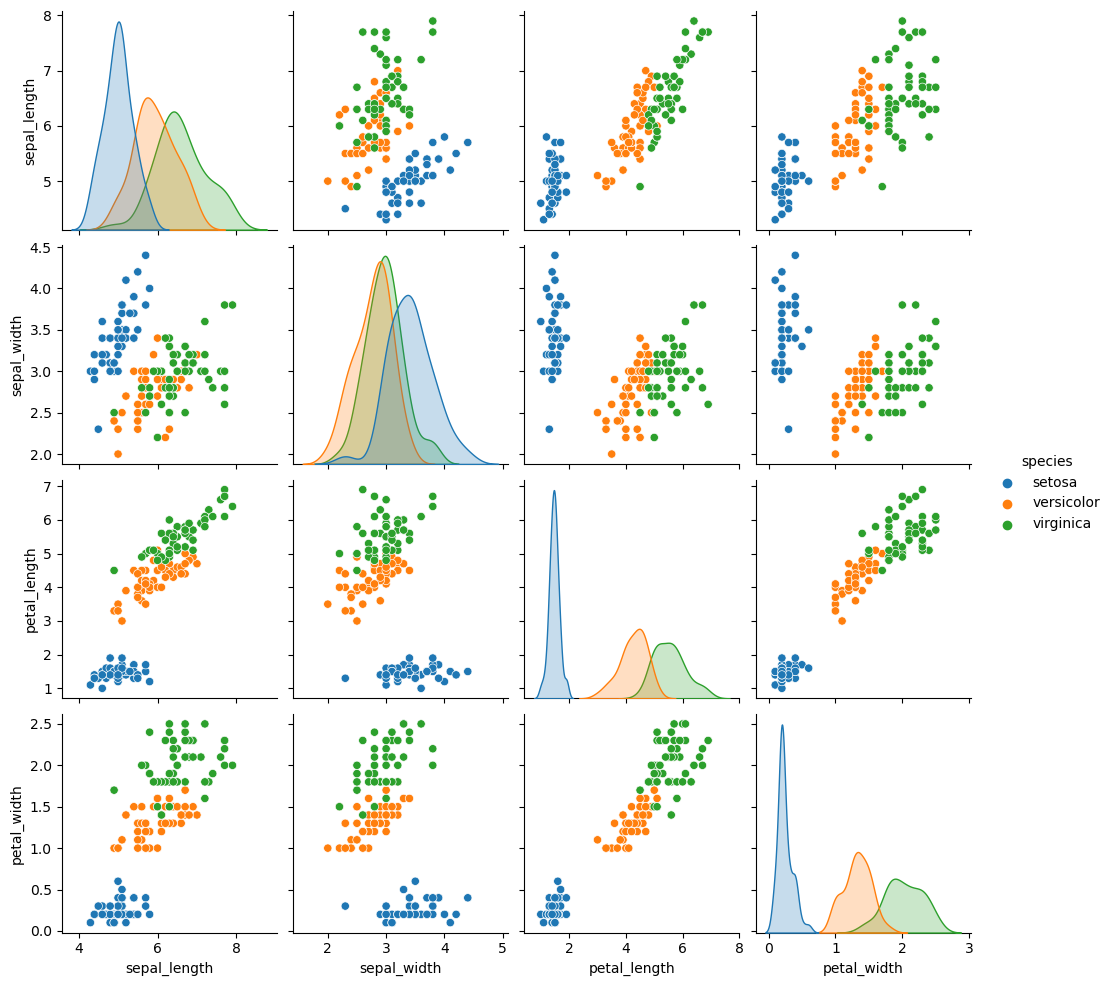

In [17]:
sns.pairplot(iris, hue='species')

<Axes: xlabel='sepal_length', ylabel='petal_length'>

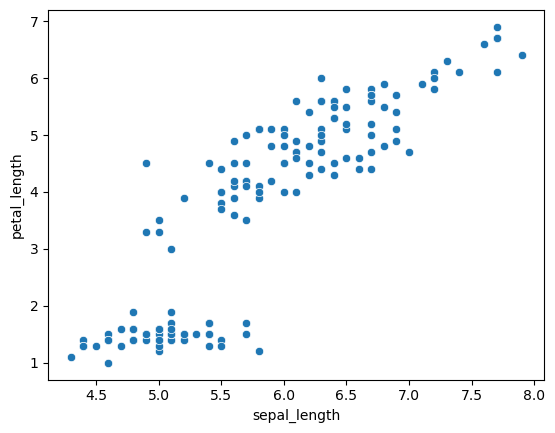

In [18]:
sns.scatterplot(x='sepal_length', y='petal_length', data=iris)

<Axes: ylabel='Frequency'>

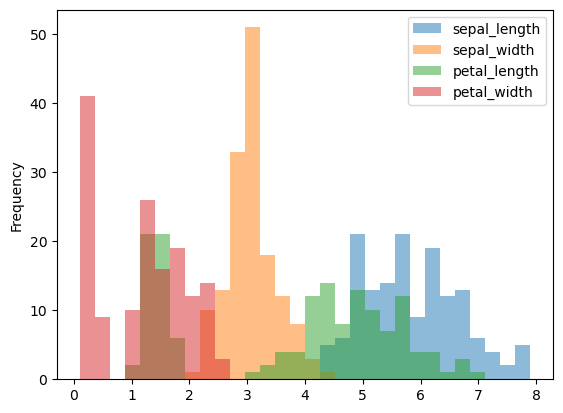

In [19]:
iris.plot.hist(bins=30, alpha=0.5)

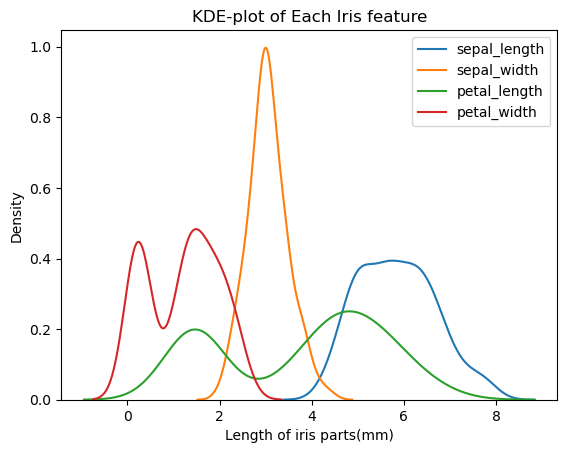

In [24]:
num_col = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

for column in num_col.columns:
    sns.kdeplot(num_col[column], label=column)

plt.title('KDE-plot of Each Iris feature')
plt.xlabel('Length of iris parts(mm)')
plt.ylabel('Density')
plt.legend()
plt.show()

In [20]:
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [39]:
from sklearn.preprocessing import LabelEncoder

In [42]:
label_encoder = LabelEncoder()
iris['species'] = label_encoder.fit_transform(iris['species'])

In [44]:
X = iris.drop('species', axis=1)

y = iris['species'].astype(str)

y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: object

In [46]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [56]:
from lazypredict.Supervised import LazyClassifier

In [57]:
possible_algos = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None, predictions=True)
models, predictions = possible_algos.fit(X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:03<00:00,  7.54it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000079 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 87
[LightGBM] [Info] Number of data points in the train set: 112, number of used features: 4
[LightGBM] [Info] Start training from score -1.080913
[LightGBM] [Info] Start training from score -1.107581
[LightGBM] [Info] Start training from score -1.107581
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

In [58]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearDiscriminantAnalysis,1.00,1.00,None,1.00,0.02
QuadraticDiscriminantAnalysis,1.00,1.00,None,1.00,0.04
SVC,0.95,0.95,None,0.95,0.06
ExtraTreeClassifier,0.95,0.95,None,0.95,0.07
ExtraTreesClassifier,0.95,0.95,None,0.95,0.69
LabelPropagation,0.95,0.95,None,0.95,0.03
LabelSpreading,0.95,0.95,None,0.95,0.08
NuSVC,0.92,0.92,None,0.92,0.04
RandomForestClassifier,0.92,0.92,None,0.92,0.49


In [59]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [60]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score, precision_score


Accuracy Score is:  1.0
F1 Score is:  1.0
Recall Score is:  1.0
Precision Score is:  1.0
Precision Score is:  1.0


Text(0.5, 1.0, 'Confusion Matrix QuadraticDiscriminantAnalysis')

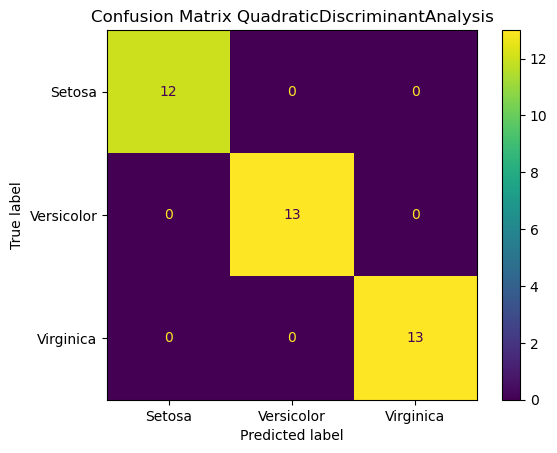

In [63]:
AccuracyScore = []
f1score =[]
RecallScore = []
PrecisionScore = []

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_qda = qda.predict(X_test)

acc_score= accuracy_score(y_test, y_qda)
f1 = f1_score(y_test, y_qda, average='weighted')
recall= recall_score(y_test, y_qda, average='weighted')
precision= precision_score(y_test, y_qda, average='weighted')
    
AccuracyScore.append(acc_score)
f1score.append(f1)
RecallScore.append(recall)
PrecisionScore.append(precision)

print("Accuracy Score is: ", np.mean(AccuracyScore))
print("F1 Score is: ", np.mean(f1score))
print("Recall Score is: ", np.mean(RecallScore))
print("Precision Score is: ", np.mean(PrecisionScore))
print("Precision Score is: ", np.mean(PrecisionScore))

confuison_matrix = confusion_matrix(y_true=y_test, y_pred=y_qda)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confuison_matrix, display_labels=["Setosa", "Versicolor", 'Virginica'])
cm_display.plot()
plt.title("Confusion Matrix QuadraticDiscriminantAnalysis")

Accuracy Score is:  1.0
F1 Score is:  1.0
Recall Score is:  1.0
Precision Score is:  1.0
Precision Score is:  1.0


Text(0.5, 1.0, 'Confusion Matrix LinearDiscriminantAnalysis')

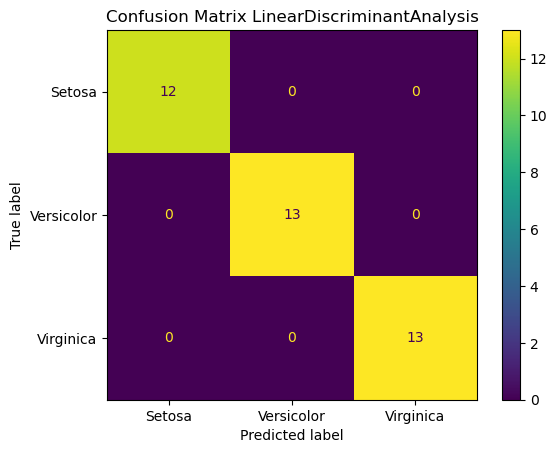

In [62]:
AccuracyScore = []
f1score =[]
RecallScore = []
PrecisionScore = []

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_lda = lda.predict(X_test)

acc_score= accuracy_score(y_test, y_lda)
f1 = f1_score(y_test, y_lda, average='weighted')
recall= recall_score(y_test, y_lda, average='weighted')
precision= precision_score(y_test, y_lda, average='weighted')
    
AccuracyScore.append(acc_score)
f1score.append(f1)
RecallScore.append(recall)
PrecisionScore.append(precision)

print("Accuracy Score is: ", np.mean(AccuracyScore))
print("F1 Score is: ", np.mean(f1score))
print("Recall Score is: ", np.mean(RecallScore))
print("Precision Score is: ", np.mean(PrecisionScore))
print("Precision Score is: ", np.mean(PrecisionScore))

confuison_matrix = confusion_matrix(y_true=y_test, y_pred=y_lda)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confuison_matrix, display_labels=["Setosa", "Versicolor", 'Virginica'])
cm_display.plot()
plt.title("Confusion Matrix LinearDiscriminantAnalysis")